<a href="https://colab.research.google.com/github/qurrata111/eksplorasi/blob/master/Logistic_model_covid_19_indonesia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 31/03/2020
# inspired by https://towardsdatascience.com/covid-19-infection-in-italy-mathematical-models-and-predictions-7784b4d7dd8d

In [5]:
import os
for dirname, _, filenames in os.walk('drive/My Drive/covid-19-ina'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

drive/My Drive/covid-19-ina/province_timeline.csv
drive/My Drive/covid-19-ina/jabar.csv
drive/My Drive/covid-19-ina/jakarta.csv
drive/My Drive/covid-19-ina/neuralnetwork.txt
drive/My Drive/covid-19-ina/cases.csv
drive/My Drive/covid-19-ina/confirmed_acc.csv
drive/My Drive/covid-19-ina/province.csv
drive/My Drive/covid-19-ina/keywordtrend.csv
drive/My Drive/covid-19-ina/patient.csv


In [0]:
df = pd.read_csv('drive/My Drive/covid-19-ina/confirmed_acc.csv')

In [0]:
# mengubah format tanggal
df = df.loc[:,['date','cases']]
FMT = '%m/%d/%Y'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("3/1/2020", FMT)).days  )

In [8]:
df

,date,cases
0,-39,0
1,-38,0
2,-37,0
3,-36,0
4,-35,0
...,...,...
64,25,893
65,26,1046
66,27,1155
67,28,1285


In [0]:
#Data tambahan sejak 18 Maret 2020
df = df.append({'date' : 17 , 'cases' : 227} , ignore_index=True) #18 Maret
df= df.append({'date' : 18, 'cases' : 309}, ignore_index=True) #19 Maret
df= df.append({'date' : 19, 'cases' : 369}, ignore_index=True) #20 Maret
df=df.append({'date' : 20, 'cases' : 450}, ignore_index=True) #21 Maret
df=df.append({'date' : 21, 'cases' : 514}, ignore_index=True) #22 Maret
df=df.append({'date' : 22, 'cases' : 579}, ignore_index=True) #23 Maret
df=df.append({'date' : 23, 'cases' : 686}, ignore_index=True) #24 Maret
df=df.append({'date' : 24, 'cases' : 790}, ignore_index=True) #25 Maret
df=df.append({'date' : 25, 'cases' : 893}, ignore_index=True) #26 Maret
df=df.append({'date' : 26, 'cases' : 1046}, ignore_index=True) #27 Maret
df=df.append({'date' : 27, 'cases' : 1155}, ignore_index=True) #28 Maret
df=df.append({'date' : 28, 'cases' : 1285}, ignore_index=True) #29 Maret
df=df.append({'date' : 29, 'cases' : 1414}, ignore_index=True) #30 Maret

In [10]:
df

,date,cases
0,-39,0
1,-38,0
2,-37,0
3,-36,0
4,-35,0
...,...,...
77,25,893
78,26,1046
79,27,1155
80,28,1285


In [0]:
# The logistic model has been widely used to describe the growth of a population
# An infection can be described as the growth of the population of a pathogen agent
# so a logistic model seems reasonable.
# x adalah waktu
# a adalah kecepatan infeksi
# b hari dengan maksimum infeksi yg terjadi
# c total orang yg terinfeksi ketika infeksi berakhir
def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

In [0]:
# We can use the curve_fit function of scipy library 
# to estimate the parameter values and errors starting from the original data.
x = list(df.iloc[39:,0])
y = list(df.iloc[39:,1])
fit = curve_fit(logistic_model,x,y)

In [18]:
a, b = fit
a

array([   4.48953391,   26.56543077, 2217.87932481])

In [19]:
# hitung eror dalam data
errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]
errors

[0.11412271001299165, 0.37383667479498023, 88.85694189310998]

In [0]:
# worst case
A = a[0]+errors[0]
B = a[1]+errors[1]
C = a[2]+errors[2]

In [22]:
# Jumlah hari maksimal dari 1 Maret 2020
sol = int(fsolve(lambda x : logistic_model(x,A,B,C) - int(C),B))
sol

63

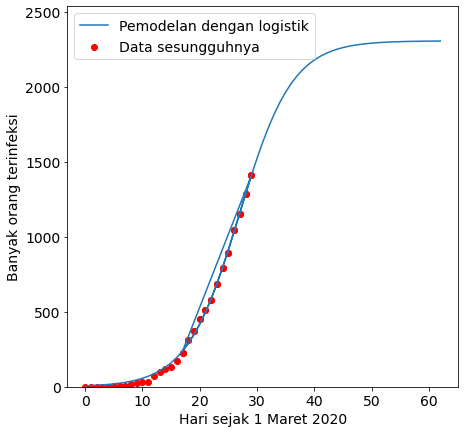

In [26]:
pred_x = list(range(max(x),sol))
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)# Real data
plt.scatter(x,y,label="Data sesungguhnya",color="red")

# Predicted logistic curve
plt.plot(x+pred_x, [logistic_model(i,A,B,C) for i in x+pred_x], label="Pemodelan dengan logistik" )

plt.legend()
plt.xlabel("Hari sejak 1 Maret 2020")
plt.ylabel("Banyak orang terinfeksi")
plt.ylim((min(y)*0.9,C*1.1))
plt.show()

In [27]:
# analisis residu (?)
# Residuals are the differences between each experimental point and 
# the corresponding theoretical point
# We can analyze the residuals of both models in order to
# verify the best fitting curve.
# In a first approximation, the lower Mean Squared Error between theoretical and
# experimental data, the better the fit.
y_pred_logistic = [logistic_model(i,A,B,C) for i in x]
p = mean_squared_error(y,y_pred_logistic)

s1 = (np.subtract(y,y_pred_logistic)**2).sum()
s2 = (np.subtract(y,np.mean(y))**2).sum()
r = 1-s1/s2
print("R^2 adalah {}".format(r))
print("Mean square errornya adalah {}".format(p))

R^2 adalah 0.9986315670977643
Mean square errornya adalah 278.15485357585766


In [0]:
# prediksi tanggal wabah maksimal
from datetime import timedelta, date
from datetime import datetime  
from datetime import timedelta 

start_date = "01/03/20"

date_1 = datetime.strptime(start_date, "%d/%m/%y")

end_date = date_1 + timedelta(days=sol)

x=end_date.strftime("%d %B %Y")

In [30]:
print("Prediksi jumlah kasus maks di indonesia adalah {:f}".format(a[2]+errors[2])) #Penambahan dengan error
print("Wabah akan berakhir {:.0f} hari setelah 1 Maret 2020 atau {}". format(sol,x))

Prediksi jumlah kasus maks di indonesia adalah 2306.736267
Wabah akan berakhir 63 hari setelah 1 Maret 2020 atau 03 May 2020
